In [1]:
# import utility functions
import utils
from utils.flow_models import *
from utils.target import *
from utils.training import *

# import pytorch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.distributions.transforms as transform
# set number of threads
torch.set_num_threads(8)

# numerical libs
import scipy
import scipy.io

# import plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import I/O
import os
import sys

# set seed
seed = 1
np.random.seed(seed)
torch.manual_seed(0)

def loss_func_init(x, prior_logpdf, targ_logpdf):
        """ evaluate initial KL divergence between posterior distribution (NF + prior) 
        and target. x is samples without flow. This is a Monte-Carlo estimation of the 
        log partition function. """
        return (prior_logpdf - targ_logpdf(x)).mean()

## GL 1d Spin-Glass


### Rank $\le 2$ Tensorizing

::BacthNormFlow: Using exact stats: spin_glass, for initialization. 
::BacthNormFlow: Using exact stats: spin_glass, for initialization. 
::BacthNormFlow: Using exact stats: spin_glass, for initialization. 
::BacthNormFlow: Using exact stats: spin_glass, for initialization. 
[ Before Training ]:: ( KL-Divergence ) = -55.5549768563973


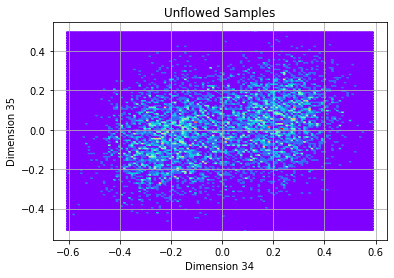

[ #### ]:: In training ...  ... (epoch1=>batch0)
[ #### ]:: In training ...  ... (epoch1=>batch10)
[ #### ]:: In training ...  ... (epoch1=>batch20)
[ #### ]:: In training ...  ... (epoch1=>batch30)
[ #### ]:: In training ...  ... (epoch1=>batch40)
[ #### ]:: In training ...  ... (epoch1=>batch50)
[ #### ]:: In training ...  ... (epoch1=>batch60)
[ #### ]:: In training ...  ... (epoch1=>batch70)


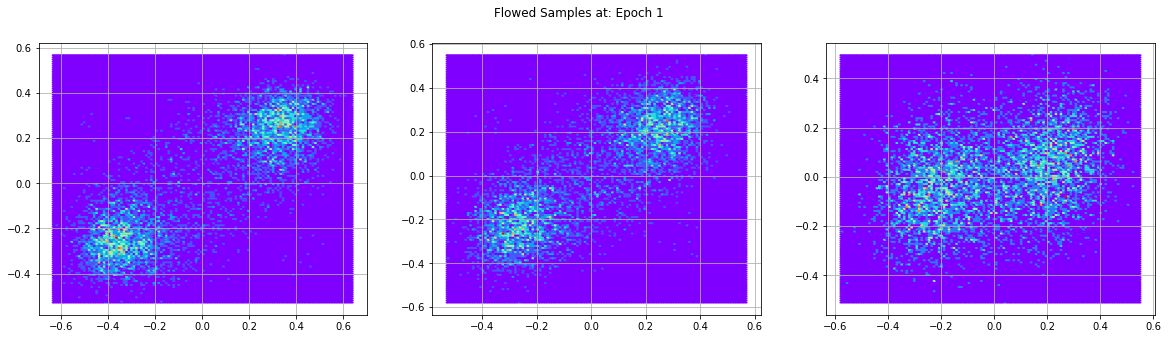

[ Epoch  1 ]:: ( Train Avg. Over Epoch ) = -52.924806899730434, ( Generalization ) = -55.555975735530644
[ ======== ]:: Report Learning Rate =  0.0004961149770332165
[ ======== ]:: Report Norm of Gradient =  2397.2663976448894
[ #### ]:: In training ...  ... (epoch2=>batch0)
[ #### ]:: In training ...  ... (epoch2=>batch10)
[ #### ]:: In training ...  ... (epoch2=>batch20)
[ #### ]:: In training ...  ... (epoch2=>batch30)
[ #### ]:: In training ...  ... (epoch2=>batch40)
[ #### ]:: In training ...  ... (epoch2=>batch50)
[ #### ]:: In training ...  ... (epoch2=>batch60)
[ #### ]:: In training ...  ... (epoch2=>batch70)
[ Epoch  2 ]:: ( Train Avg. Over Epoch ) = -52.55753474855492, ( Generalization ) = -55.59796954599359
[ ======== ]:: Report Learning Rate =  0.0004922601408733373
[ ======== ]:: Report Norm of Gradient =  4831.614612121213
[ #### ]:: In training ...  ... (epoch3=>batch0)
[ #### ]:: In training ...  ... (epoch3=>batch10)
[ #### ]:: In training ...  ... (epoch3=>batch20)
[

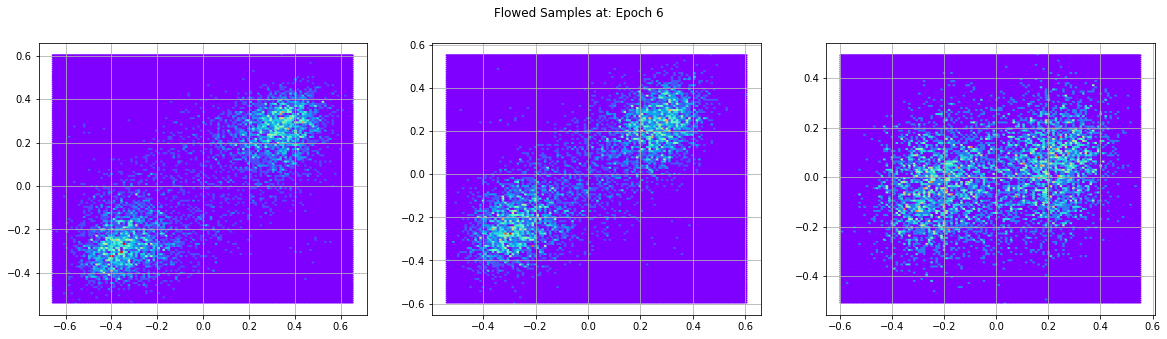

[ Epoch  6 ]:: ( Train Avg. Over Epoch ) = -53.18704538658907, ( Generalization ) = -55.69621669671382
[ ======== ]:: Report Learning Rate =  0.00047713800049779007
[ ======== ]:: Report Norm of Gradient =  698.447723792038
[ #### ]:: In training ...  ... (epoch7=>batch0)
[ #### ]:: In training ...  ... (epoch7=>batch10)
[ #### ]:: In training ...  ... (epoch7=>batch20)
[ #### ]:: In training ...  ... (epoch7=>batch30)
[ #### ]:: In training ...  ... (epoch7=>batch40)
[ #### ]:: In training ...  ... (epoch7=>batch50)
[ #### ]:: In training ...  ... (epoch7=>batch60)
[ #### ]:: In training ...  ... (epoch7=>batch70)
[ Epoch  7 ]:: ( Train Avg. Over Epoch ) = -53.311389381547976, ( Generalization ) = -55.72292433357977
[ ======== ]:: Report Learning Rate =  0.00047343061631727163
[ ======== ]:: Report Norm of Gradient =  474.04334094872166
[ #### ]:: In training ...  ... (epoch8=>batch0)
[ #### ]:: In training ...  ... (epoch8=>batch10)
[ #### ]:: In training ...  ... (epoch8=>batch20)
[

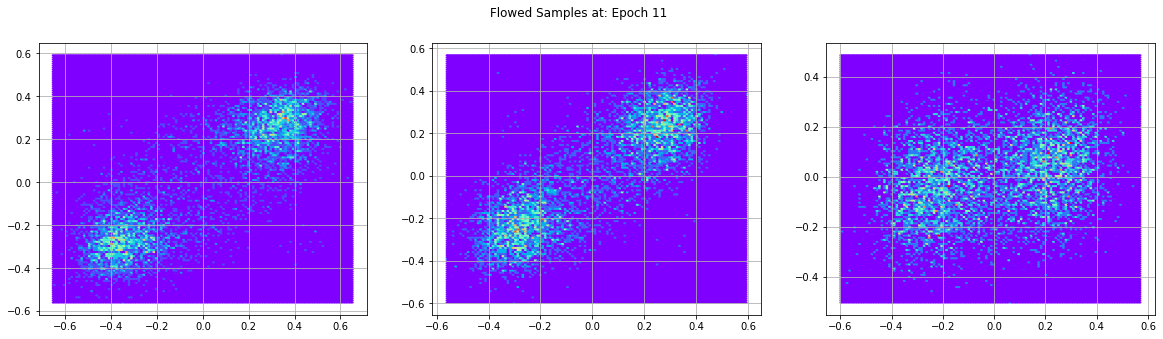

[ Epoch  11 ]:: ( Train Avg. Over Epoch ) = -53.48722514468527, ( Generalization ) = -55.78534943793006
[ ======== ]:: Report Learning Rate =  0.0004588869154494138
[ ======== ]:: Report Norm of Gradient =  2168.7750655554705
[ #### ]:: In training ...  ... (epoch12=>batch0)
[ #### ]:: In training ...  ... (epoch12=>batch10)
[ #### ]:: In training ...  ... (epoch12=>batch20)
[ #### ]:: In training ...  ... (epoch12=>batch30)
[ #### ]:: In training ...  ... (epoch12=>batch40)
[ #### ]:: In training ...  ... (epoch12=>batch50)
[ #### ]:: In training ...  ... (epoch12=>batch60)
[ #### ]:: In training ...  ... (epoch12=>batch70)
[ Epoch  12 ]:: ( Train Avg. Over Epoch ) = -53.54677308610577, ( Generalization ) = -55.759212227910346
[ ======== ]:: Report Learning Rate =  0.00045532134303805864
[ ======== ]:: Report Norm of Gradient =  252.93917364437476
[ #### ]:: In training ...  ... (epoch13=>batch0)
[ #### ]:: In training ...  ... (epoch13=>batch10)
[ #### ]:: In training ...  ... (epoch

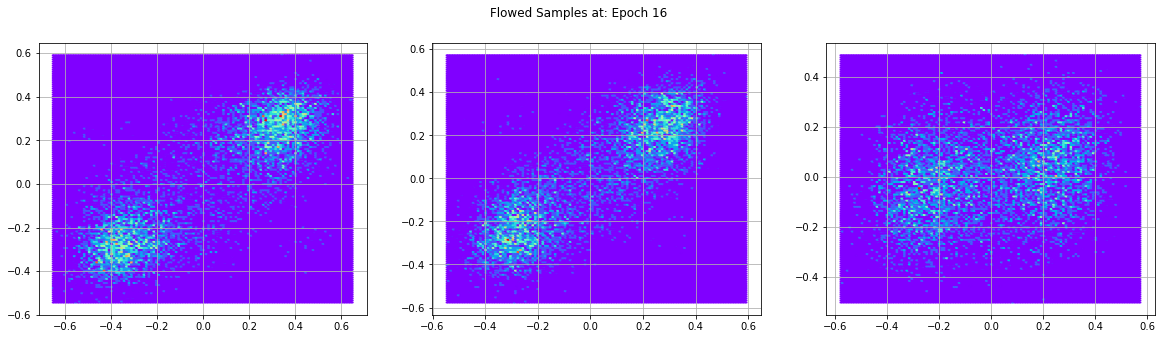

[ Epoch  16 ]:: ( Train Avg. Over Epoch ) = -53.58153602804088, ( Generalization ) = -55.77456142489268
[ ======== ]:: Report Learning Rate =  0.00044133395569203394
[ ======== ]:: Report Norm of Gradient =  408.8171653999229
[ #### ]:: In training ...  ... (epoch17=>batch0)
[ #### ]:: In training ...  ... (epoch17=>batch10)
[ #### ]:: In training ...  ... (epoch17=>batch20)
[ #### ]:: In training ...  ... (epoch17=>batch30)
[ #### ]:: In training ...  ... (epoch17=>batch40)
[ #### ]:: In training ...  ... (epoch17=>batch50)
[ #### ]:: In training ...  ... (epoch17=>batch60)
[ #### ]:: In training ...  ... (epoch17=>batch70)
[ Epoch  17 ]:: ( Train Avg. Over Epoch ) = -53.22036481227732, ( Generalization ) = -55.757601184426186
[ ======== ]:: Report Learning Rate =  0.0004379047705842636
[ ======== ]:: Report Norm of Gradient =  551.0290664778528
[ #### ]:: In training ...  ... (epoch18=>batch0)
[ #### ]:: In training ...  ... (epoch18=>batch10)
[ #### ]:: In training ...  ... (epoch18

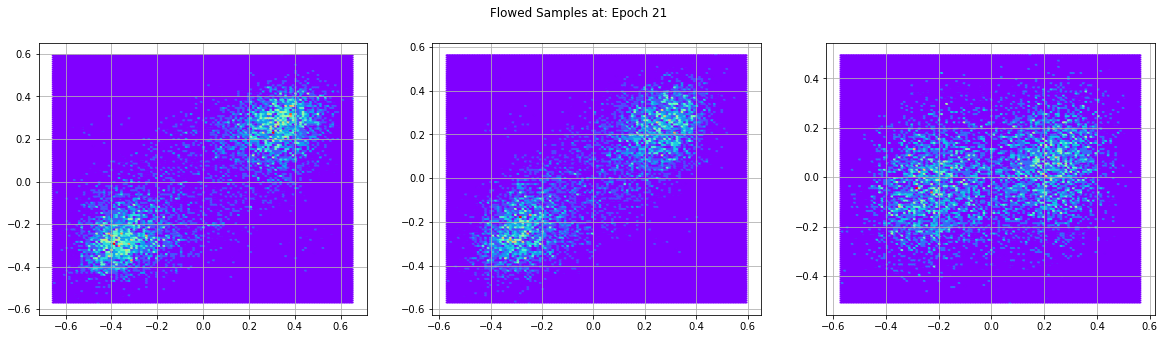

[ Epoch  21 ]:: ( Train Avg. Over Epoch ) = -52.91799647165676, ( Generalization ) = -55.73942646034176
[ ======== ]:: Report Learning Rate =  0.000424452417118983
[ ======== ]:: Report Norm of Gradient =  387.7225155990683
[ #### ]:: In training ...  ... (epoch22=>batch0)
[ #### ]:: In training ...  ... (epoch22=>batch10)
[ #### ]:: In training ...  ... (epoch22=>batch20)
[ #### ]:: In training ...  ... (epoch22=>batch30)
[ #### ]:: In training ...  ... (epoch22=>batch40)
[ #### ]:: In training ...  ... (epoch22=>batch50)
[ #### ]:: In training ...  ... (epoch22=>batch60)
[ #### ]:: In training ...  ... (epoch22=>batch70)
[ Epoch  22 ]:: ( Train Avg. Over Epoch ) = -52.67104046539233, ( Generalization ) = -55.70665434946901
[ ======== ]:: Report Learning Rate =  0.00042115440234135476
[ ======== ]:: Report Norm of Gradient =  1620.5222301063607
[ #### ]:: In training ...  ... (epoch23=>batch0)
[ #### ]:: In training ...  ... (epoch23=>batch10)
[ #### ]:: In training ...  ... (epoch23=

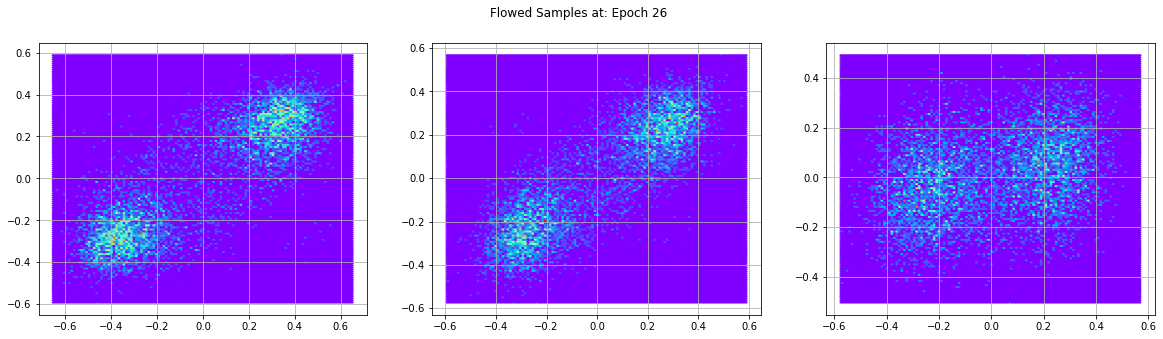

[ Epoch  26 ]:: ( Train Avg. Over Epoch ) = -53.33563786695678, ( Generalization ) = -55.75167983555397
[ ======== ]:: Report Learning Rate =  0.0004082166170868212
[ ======== ]:: Report Norm of Gradient =  649.8212578430921
[ #### ]:: In training ...  ... (epoch27=>batch0)
[ #### ]:: In training ...  ... (epoch27=>batch10)
[ #### ]:: In training ...  ... (epoch27=>batch20)
[ #### ]:: In training ...  ... (epoch27=>batch30)
[ #### ]:: In training ...  ... (epoch27=>batch40)
[ #### ]:: In training ...  ... (epoch27=>batch50)
[ #### ]:: In training ...  ... (epoch27=>batch60)
[ #### ]:: In training ...  ... (epoch27=>batch70)
[ Epoch  27 ]:: ( Train Avg. Over Epoch ) = -53.39301235021405, ( Generalization ) = -55.74621133029519
[ ======== ]:: Report Learning Rate =  0.0004050447552212111
[ ======== ]:: Report Norm of Gradient =  460.2505249488599
[ #### ]:: In training ...  ... (epoch28=>batch0)
[ #### ]:: In training ...  ... (epoch28=>batch10)
[ #### ]:: In training ...  ... (epoch28=>

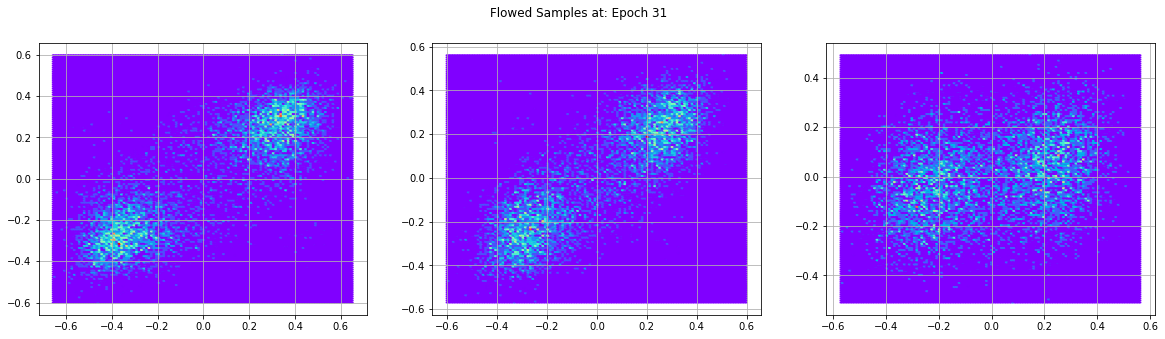

[ Epoch  31 ]:: ( Train Avg. Over Epoch ) = -53.62647853448143, ( Generalization ) = -55.73850754348117
[ ======== ]:: Report Learning Rate =  0.0003926018553431763
[ ======== ]:: Report Norm of Gradient =  1619.2700229120494
[ #### ]:: In training ...  ... (epoch32=>batch0)
[ #### ]:: In training ...  ... (epoch32=>batch10)
[ #### ]:: In training ...  ... (epoch32=>batch20)
[ #### ]:: In training ...  ... (epoch32=>batch30)
[ #### ]:: In training ...  ... (epoch32=>batch40)
[ #### ]:: In training ...  ... (epoch32=>batch50)
[ #### ]:: In training ...  ... (epoch32=>batch60)
[ #### ]:: In training ...  ... (epoch32=>batch70)
[ Epoch  32 ]:: ( Train Avg. Over Epoch ) = -53.23258175773346, ( Generalization ) = -55.71023449744854
[ ======== ]:: Report Learning Rate =  0.00038955132089355606
[ ======== ]:: Report Norm of Gradient =  1538.5484179978528
[ #### ]:: In training ...  ... (epoch33=>batch0)
[ #### ]:: In training ...  ... (epoch33=>batch10)
[ #### ]:: In training ...  ... (epoch3

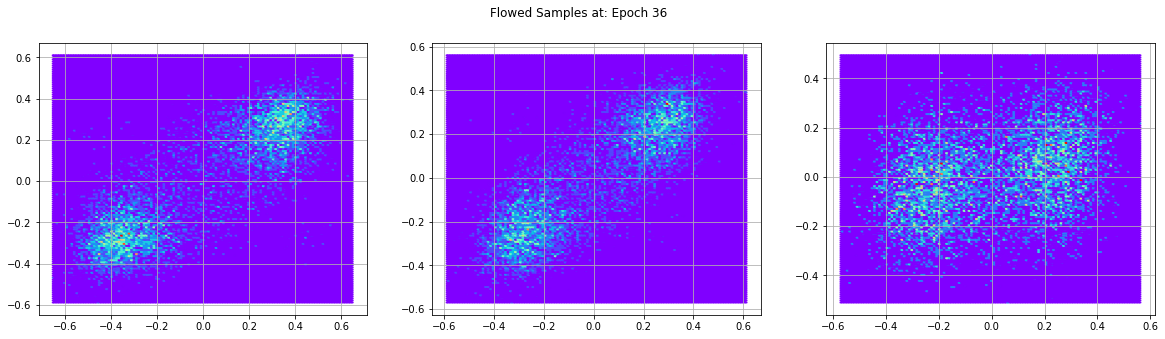

[ Epoch  36 ]:: ( Train Avg. Over Epoch ) = -53.47200714714884, ( Generalization ) = -55.7154702582842
[ ======== ]:: Report Learning Rate =  0.00037758437644913937
[ ======== ]:: Report Norm of Gradient =  816.9999855299047
[ #### ]:: In training ...  ... (epoch37=>batch0)
[ #### ]:: In training ...  ... (epoch37=>batch10)
[ #### ]:: In training ...  ... (epoch37=>batch20)
[ #### ]:: In training ...  ... (epoch37=>batch30)
[ #### ]:: In training ...  ... (epoch37=>batch40)
[ #### ]:: In training ...  ... (epoch37=>batch50)
[ #### ]:: In training ...  ... (epoch37=>batch60)
[ #### ]:: In training ...  ... (epoch37=>batch70)
[ Epoch  37 ]:: ( Train Avg. Over Epoch ) = -53.53084739675238, ( Generalization ) = -55.70423743127403
[ ======== ]:: Report Learning Rate =  0.00037465052850033196
[ ======== ]:: Report Norm of Gradient =  487.32737718875705
[ #### ]:: In training ...  ... (epoch38=>batch0)
[ #### ]:: In training ...  ... (epoch38=>batch10)
[ #### ]:: In training ...  ... (epoch38

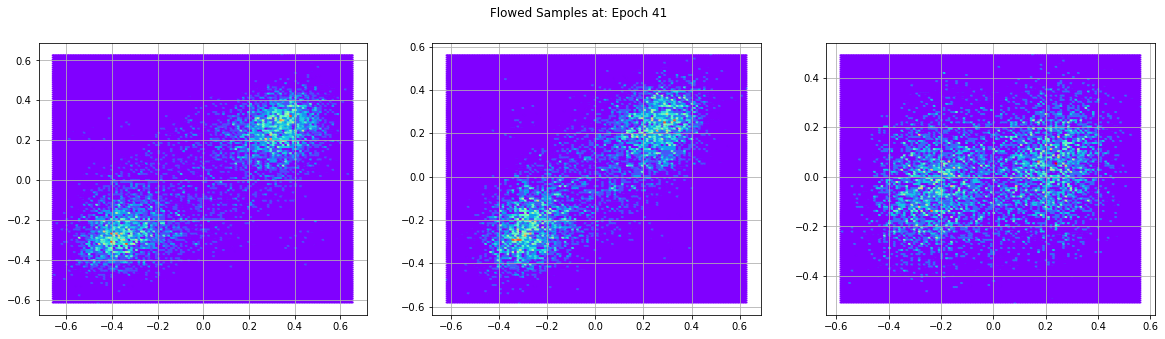

[ Epoch  41 ]:: ( Train Avg. Over Epoch ) = -53.53716827203277, ( Generalization ) = -55.675694670392055
[ ======== ]:: Report Learning Rate =  0.0003631413336390472
[ ======== ]:: Report Norm of Gradient =  763.9606744521903
[ #### ]:: In training ...  ... (epoch42=>batch0)
[ #### ]:: In training ...  ... (epoch42=>batch10)
[ #### ]:: In training ...  ... (epoch42=>batch20)
[ #### ]:: In training ...  ... (epoch42=>batch30)
[ #### ]:: In training ...  ... (epoch42=>batch40)
[ #### ]:: In training ...  ... (epoch42=>batch50)
[ #### ]:: In training ...  ... (epoch42=>batch60)
[ #### ]:: In training ...  ... (epoch42=>batch70)
[ Epoch  42 ]:: ( Train Avg. Over Epoch ) = -53.08834949913748, ( Generalization ) = -55.66782267523554
[ ======== ]:: Report Learning Rate =  0.0003603197087962947
[ ======== ]:: Report Norm of Gradient =  136.7667193739041
[ #### ]:: In training ...  ... (epoch43=>batch0)
[ #### ]:: In training ...  ... (epoch43=>batch10)
[ #### ]:: In training ...  ... (epoch43=

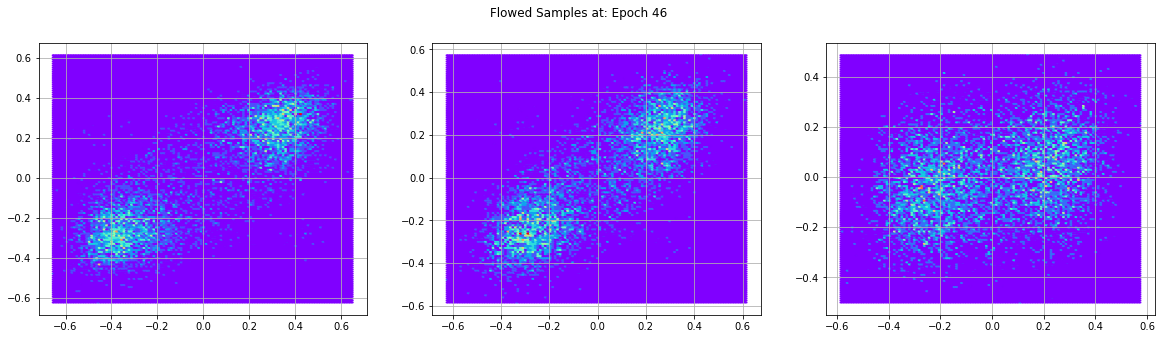

[ Epoch  46 ]:: ( Train Avg. Over Epoch ) = -53.39931525393788, ( Generalization ) = -55.65552910388514
[ ======== ]:: Report Learning Rate =  0.000349250754062672
[ ======== ]:: Report Norm of Gradient =  857.8080588910964
[ #### ]:: In training ...  ... (epoch47=>batch0)
[ #### ]:: In training ...  ... (epoch47=>batch10)
[ #### ]:: In training ...  ... (epoch47=>batch20)
[ #### ]:: In training ...  ... (epoch47=>batch30)
[ #### ]:: In training ...  ... (epoch47=>batch40)
[ #### ]:: In training ...  ... (epoch47=>batch50)
[ #### ]:: In training ...  ... (epoch47=>batch60)
[ #### ]:: In training ...  ... (epoch47=>batch70)
[ Epoch  47 ]:: ( Train Avg. Over Epoch ) = -53.91446840306768, ( Generalization ) = -55.668514311216505
[ ======== ]:: Report Learning Rate =  0.0003465370596612721
[ ======== ]:: Report Norm of Gradient =  419.29288961553084
[ #### ]:: In training ...  ... (epoch48=>batch0)
[ #### ]:: In training ...  ... (epoch48=>batch10)
[ #### ]:: In training ...  ... (epoch48=

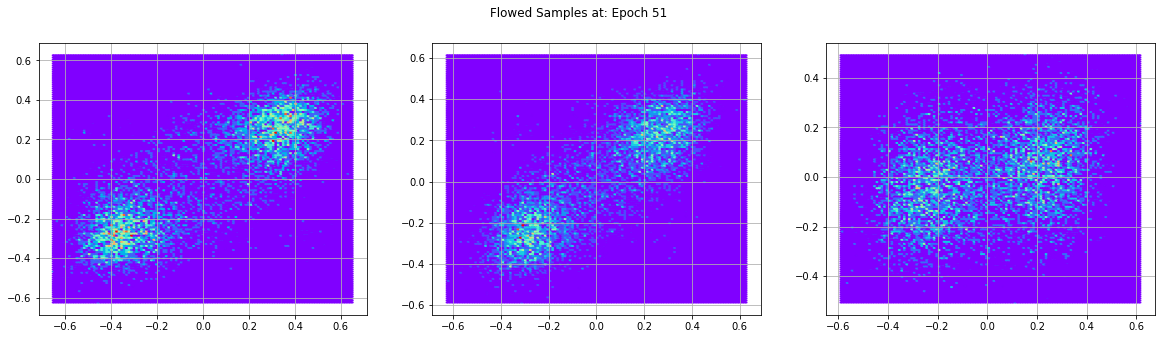

[ Epoch  51 ]:: ( Train Avg. Over Epoch ) = -53.703394395361975, ( Generalization ) = -55.63422461065667
[ ======== ]:: Report Learning Rate =  0.00033589150535693653
[ ======== ]:: Report Norm of Gradient =  1054.6506818134628
[ #### ]:: In training ...  ... (epoch52=>batch0)
[ #### ]:: In training ...  ... (epoch52=>batch10)
[ #### ]:: In training ...  ... (epoch52=>batch20)
[ #### ]:: In training ...  ... (epoch52=>batch30)
[ #### ]:: In training ...  ... (epoch52=>batch40)
[ #### ]:: In training ...  ... (epoch52=>batch50)
[ #### ]:: In training ...  ... (epoch52=>batch60)
[ #### ]:: In training ...  ... (epoch52=>batch70)
[ Epoch  52 ]:: ( Train Avg. Over Epoch ) = -53.3858487005636, ( Generalization ) = -55.620188643325655
[ ======== ]:: Report Learning Rate =  0.000333281612931618
[ ======== ]:: Report Norm of Gradient =  3658.4646829006274
[ #### ]:: In training ...  ... (epoch53=>batch0)
[ #### ]:: In training ...  ... (epoch53=>batch10)
[ #### ]:: In training ...  ... (epoch5

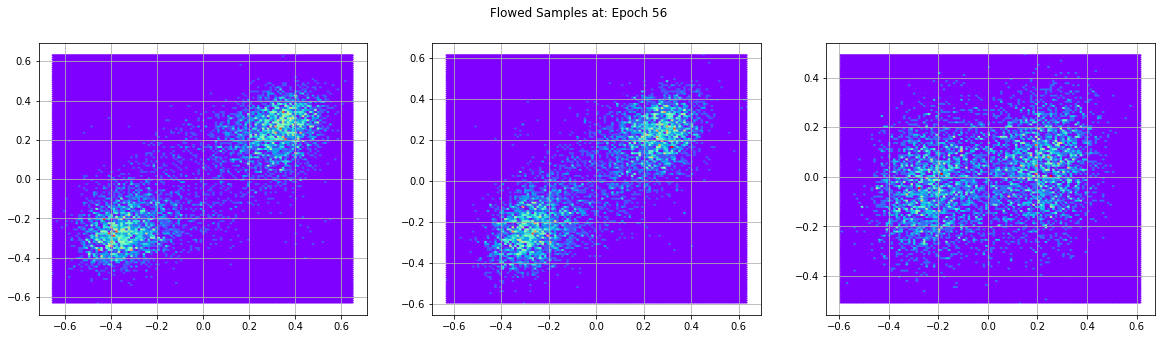

[ Epoch  56 ]:: ( Train Avg. Over Epoch ) = -53.40664095507432, ( Generalization ) = -55.60494226712073
[ ======== ]:: Report Learning Rate =  0.00032304326349629874
[ ======== ]:: Report Norm of Gradient =  647.1095965523812
[ #### ]:: In training ...  ... (epoch57=>batch0)
[ #### ]:: In training ...  ... (epoch57=>batch10)
[ #### ]:: In training ...  ... (epoch57=>batch20)
[ #### ]:: In training ...  ... (epoch57=>batch30)
[ #### ]:: In training ...  ... (epoch57=>batch40)
[ #### ]:: In training ...  ... (epoch57=>batch50)
[ #### ]:: In training ...  ... (epoch57=>batch60)
[ #### ]:: In training ...  ... (epoch57=>batch70)
[ Epoch  57 ]:: ( Train Avg. Over Epoch ) = -53.84094083297519, ( Generalization ) = -55.5942366925523
[ ======== ]:: Report Learning Rate =  0.000320533202500403
[ ======== ]:: Report Norm of Gradient =  968.9047772167121
[ #### ]:: In training ...  ... (epoch58=>batch0)
[ #### ]:: In training ...  ... (epoch58=>batch10)
[ #### ]:: In training ...  ... (epoch58=>b

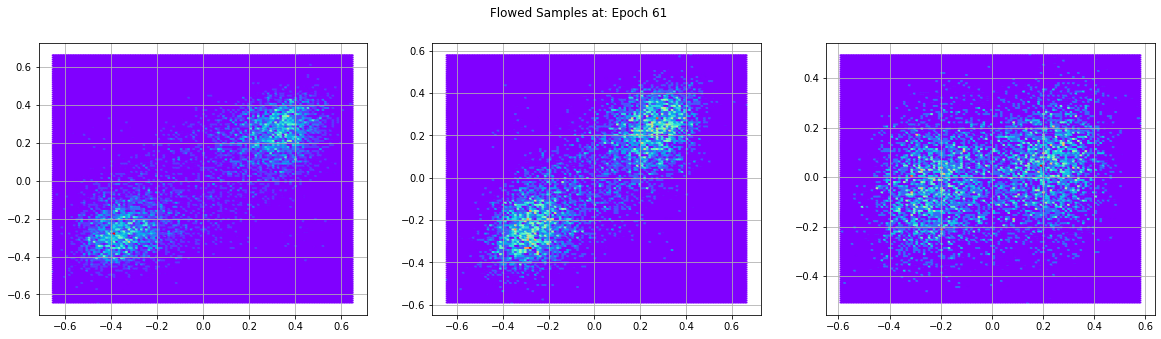

[ Epoch  61 ]:: ( Train Avg. Over Epoch ) = -53.52012273942555, ( Generalization ) = -55.56074650154755
[ ======== ]:: Report Learning Rate =  0.0003106864818729003
[ ======== ]:: Report Norm of Gradient =  1180.5485527721373
[ #### ]:: In training ...  ... (epoch62=>batch0)
[ #### ]:: In training ...  ... (epoch62=>batch10)
[ #### ]:: In training ...  ... (epoch62=>batch20)
[ #### ]:: In training ...  ... (epoch62=>batch30)
[ #### ]:: In training ...  ... (epoch62=>batch40)
[ #### ]:: In training ...  ... (epoch62=>batch50)
[ #### ]:: In training ...  ... (epoch62=>batch60)
[ #### ]:: In training ...  ... (epoch62=>batch70)
[ Epoch  62 ]:: ( Train Avg. Over Epoch ) = -53.91619586982141, ( Generalization ) = -55.57874794883398
[ ======== ]:: Report Learning Rate =  0.0003082724336378093
[ ======== ]:: Report Norm of Gradient =  208.94887869877869
[ #### ]:: In training ...  ... (epoch63=>batch0)
[ #### ]:: In training ...  ... (epoch63=>batch10)
[ #### ]:: In training ...  ... (epoch63

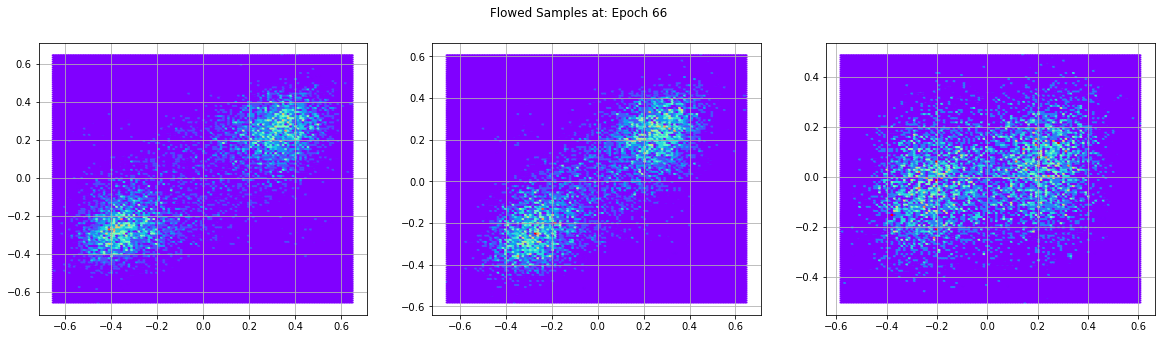

[ Epoch  66 ]:: ( Train Avg. Over Epoch ) = -53.82426023227881, ( Generalization ) = -55.54460965719973
[ ======== ]:: Report Learning Rate =  0.0002988023615594331
[ ======== ]:: Report Norm of Gradient =  367.5632327036659
[ #### ]:: In training ...  ... (epoch67=>batch0)
[ #### ]:: In training ...  ... (epoch67=>batch10)
[ #### ]:: In training ...  ... (epoch67=>batch20)
[ #### ]:: In training ...  ... (epoch67=>batch30)
[ #### ]:: In training ...  ... (epoch67=>batch40)
[ #### ]:: In training ...  ... (epoch67=>batch50)
[ #### ]:: In training ...  ... (epoch67=>batch60)
[ #### ]:: In training ...  ... (epoch67=>batch70)
[ Epoch  67 ]:: ( Train Avg. Over Epoch ) = -53.972703973314346, ( Generalization ) = -55.54263313695037
[ ======== ]:: Report Learning Rate =  0.00029648065348505785
[ ======== ]:: Report Norm of Gradient =  320.3815303620629
[ #### ]:: In training ...  ... (epoch68=>batch0)
[ #### ]:: In training ...  ... (epoch68=>batch10)
[ #### ]:: In training ...  ... (epoch68

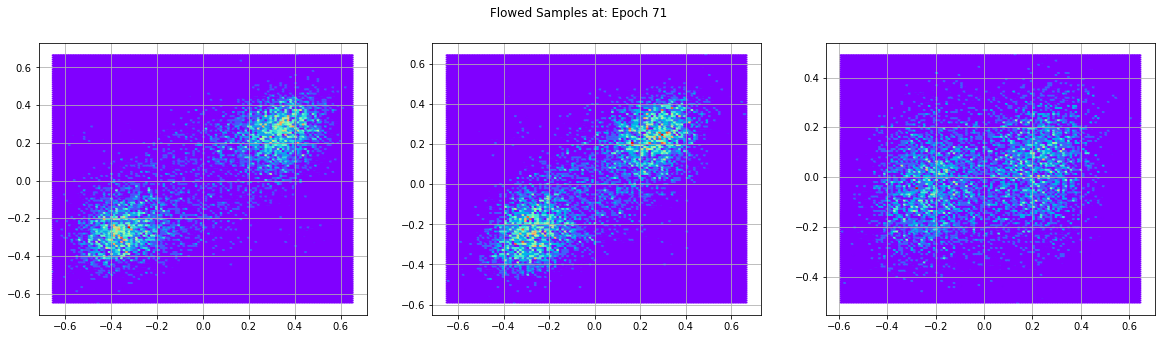

[ Epoch  71 ]:: ( Train Avg. Over Epoch ) = -53.9589271988318, ( Generalization ) = -55.52918892520179
[ ======== ]:: Report Learning Rate =  0.00028737282270948256
[ ======== ]:: Report Norm of Gradient =  449.0297544704061
[ #### ]:: In training ...  ... (epoch72=>batch0)
[ #### ]:: In training ...  ... (epoch72=>batch10)
[ #### ]:: In training ...  ... (epoch72=>batch20)
[ #### ]:: In training ...  ... (epoch72=>batch30)
[ #### ]:: In training ...  ... (epoch72=>batch40)
[ #### ]:: In training ...  ... (epoch72=>batch50)
[ #### ]:: In training ...  ... (epoch72=>batch60)
[ #### ]:: In training ...  ... (epoch72=>batch70)
[ Epoch  72 ]:: ( Train Avg. Over Epoch ) = -53.77273818374181, ( Generalization ) = -55.50329822577223
[ ======== ]:: Report Learning Rate =  0.0002851399226769709
[ ======== ]:: Report Norm of Gradient =  612.4876445263137
[ #### ]:: In training ...  ... (epoch73=>batch0)
[ #### ]:: In training ...  ... (epoch73=>batch10)
[ #### ]:: In training ...  ... (epoch73=>

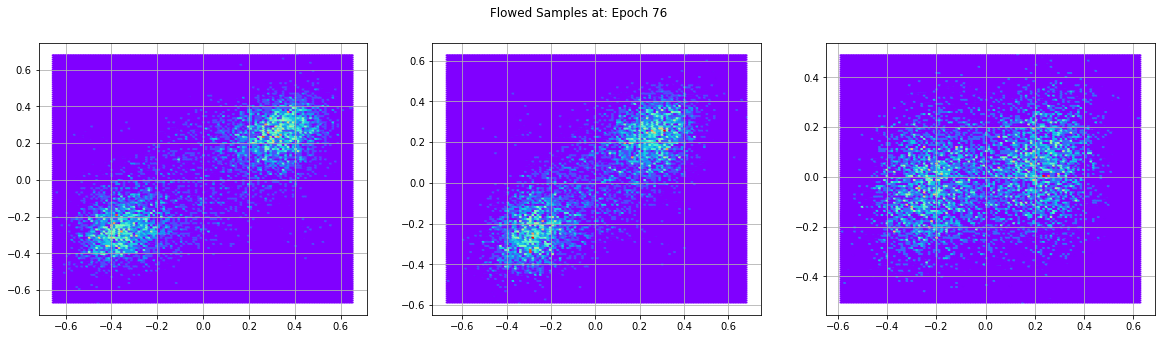

[ Epoch  76 ]:: ( Train Avg. Over Epoch ) = -53.75817582977387, ( Generalization ) = -55.48506994251558
[ ======== ]:: Report Learning Rate =  0.0002763804770518513
[ ======== ]:: Report Norm of Gradient =  1782.8889086419372
[ #### ]:: In training ...  ... (epoch77=>batch0)
[ #### ]:: In training ...  ... (epoch77=>batch10)
[ #### ]:: In training ...  ... (epoch77=>batch20)
[ #### ]:: In training ...  ... (epoch77=>batch30)
[ #### ]:: In training ...  ... (epoch77=>batch40)
[ #### ]:: In training ...  ... (epoch77=>batch50)
[ #### ]:: In training ...  ... (epoch77=>batch60)
[ #### ]:: In training ...  ... (epoch77=>batch70)
[ Epoch  77 ]:: ( Train Avg. Over Epoch ) = -53.90400677675502, ( Generalization ) = -55.49542263435837
[ ======== ]:: Report Learning Rate =  0.00027423298805001703
[ ======== ]:: Report Norm of Gradient =  940.9445697769003
[ #### ]:: In training ...  ... (epoch78=>batch0)
[ #### ]:: In training ...  ... (epoch78=>batch10)
[ #### ]:: In training ...  ... (epoch78

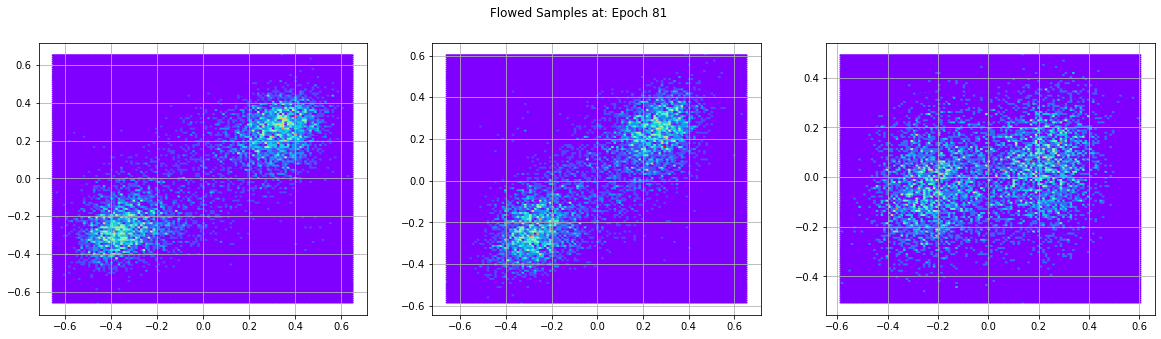

[ Epoch  81 ]:: ( Train Avg. Over Epoch ) = -53.617078634840055, ( Generalization ) = -55.45267029862156
[ ======== ]:: Report Learning Rate =  0.0002658086014369948
[ ======== ]:: Report Norm of Gradient =  921.9051796330596
[ #### ]:: In training ...  ... (epoch82=>batch0)
[ #### ]:: In training ...  ... (epoch82=>batch10)
[ #### ]:: In training ...  ... (epoch82=>batch20)
[ #### ]:: In training ...  ... (epoch82=>batch30)
[ #### ]:: In training ...  ... (epoch82=>batch40)
[ #### ]:: In training ...  ... (epoch82=>batch50)
[ #### ]:: In training ...  ... (epoch82=>batch60)
[ #### ]:: In training ...  ... (epoch82=>batch70)
[ Epoch  82 ]:: ( Train Avg. Over Epoch ) = -53.708534380407436, ( Generalization ) = -55.45937031702714
[ ======== ]:: Report Learning Rate =  0.0002637432563942922
[ ======== ]:: Report Norm of Gradient =  745.546980590277
[ #### ]:: In training ...  ... (epoch83=>batch0)
[ #### ]:: In training ...  ... (epoch83=>batch10)
[ #### ]:: In training ...  ... (epoch83=

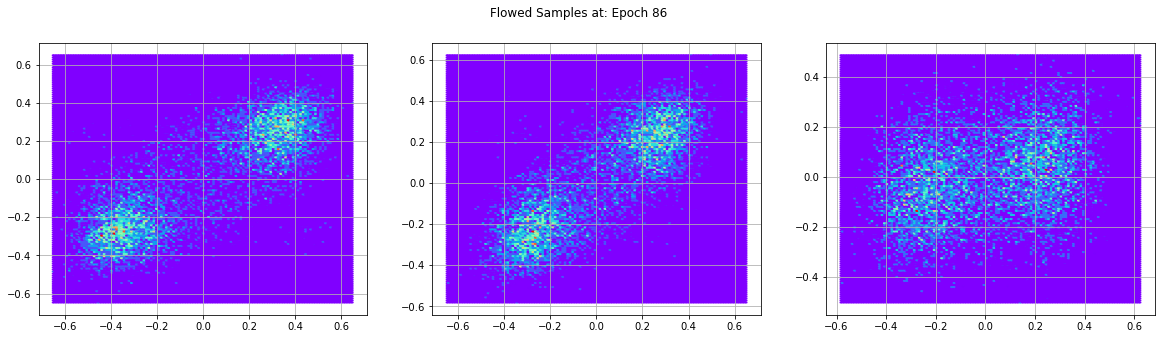

[ Epoch  86 ]:: ( Train Avg. Over Epoch ) = -53.70645061519838, ( Generalization ) = -55.441810730993126
[ ======== ]:: Report Learning Rate =  0.00025564111239534425
[ ======== ]:: Report Norm of Gradient =  203.32236533008705
[ #### ]:: In training ...  ... (epoch87=>batch0)
[ #### ]:: In training ...  ... (epoch87=>batch10)
[ #### ]:: In training ...  ... (epoch87=>batch20)
[ #### ]:: In training ...  ... (epoch87=>batch30)
[ #### ]:: In training ...  ... (epoch87=>batch40)
[ #### ]:: In training ...  ... (epoch87=>batch50)
[ #### ]:: In training ...  ... (epoch87=>batch60)
[ #### ]:: In training ...  ... (epoch87=>batch70)
[ Epoch  87 ]:: ( Train Avg. Over Epoch ) = -53.77065433125457, ( Generalization ) = -55.418884933264934
[ ======== ]:: Report Learning Rate =  0.00025365476920952417
[ ======== ]:: Report Norm of Gradient =  775.4996771444042
[ #### ]:: In training ...  ... (epoch88=>batch0)
[ #### ]:: In training ...  ... (epoch88=>batch10)
[ #### ]:: In training ...  ... (epoc

In [ ]:
# load tensorizing flow dataset
gl1d_spin_tf_dataset = utils.datasets.TensorizingFlowDataset("gl1d_spin_glass_new_truncated_rank2.mat", gaussian_data=False)
# initialize NF model
gl1d_spin_tf = NormalizingFlow(dim=gl1d_spin_tf_dataset.dim, blocks=RESNET_BLOCKS2_SPIN_GLASS, \
                            flow_length=4)

# begin training
gl1d_spin_tf_report = train(gl1d_spin_tf_dataset, gl1d_spin_tf, ginzburg_landau1d_spin_logpdf, 
          num_epochs=200,
          batch_size=2**7,
          verbose=True,
          lr=5e-4, 
          use_scheduler=True,
          grad_clip=1e+4)

In [ ]:
scipy.io.savemat("spin_glass_resnet_tf_seed{}".format(seed), gl1d_spin_tf_report)

## Normalizing

In [ ]:
# load normalizing flow dataset
gl1d_spin_nf_dataset = utils.datasets.TensorizingFlowDataset("gl1d_spin_glass_new_rank1.mat", gaussian_data=True)
# initialize NF model
gl1d_spin_nf = NormalizingFlow(dim=gl1d_spin_nf_dataset.dim, blocks=RESNET_BLOCKS2_SPIN_GLASS, \
                            flow_length=4)

# begin training
gl1d_spin_nf_report = train(gl1d_spin_nf_dataset, gl1d_spin_nf, ginzburg_landau1d_spin_logpdf, 
          num_epochs=200,
          batch_size=2**7,
          verbose=True,
          lr=5e-4, 
          use_scheduler=True,
          grad_clip=1e+4)

In [ ]:
scipy.io.savemat("spin_glass_resnet_nf_seed{}".format(seed), gl1d_spin_nf_report)

In [ ]:
gl1d_spin_tf_report['initial_loss']

## Compare

## 1 Final samples

In [ ]:
tf_data = gl1d_spin_tf_report['post_training_samples']
#nf_data = gl1d_spin_nf_report['post_training_samples']
#tf_data.shape

In [ ]:
for i in range(30-1):
    plt.figure(i);
    plt.scatter(tf_data[:, i], tf_data[:, i+1], label='tensor', color='blue', s=1.);
    #plt.scatter(nf_data[:, i], nf_data[:, i+1], label='normal', color='red', s=1.);
    plt.legend();
    plt.xlabel("Dimension {}".format(i+1)); 
    plt.ylabel("Dimension {}".format(i+2)); 
    plt.grid(True);
    plt.savefig("./figs/mixture_gaussian_final_samples_{}.png".format(i));
    plt.show();

## 2 Loss curves

In [ ]:
for i in range(100):
    plt.figure(1);
    # plot actual data
    plt.plot(tf_data[i, :], lw=2)
    
for i in range(100):
    plt.figure(2);
    # plot actual data
    plt.plot(nf_data[i, :], lw=2)

In [ ]:
plt.figure(1);
tf_loss = gl1d_spin_tf_report['test_loss']
nf_loss = gl1d_spin_nf_report['test_loss']
plt.plot(tf_loss[:], label='TF')
plt.plot(nf_loss[:], label='NF')
plt.xlabel("Epoch");
plt.ylabel("Generalization Error"); plt.grid(True); 
plt.legend()